# Taller Interpolación

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# 1.

Los siguientes datos definen la concentración de oxígeno disuelto a nivel del mar para agua dulce como función de la temperatura:
```
T = np.array([0, 8, 16, 24, 32, 40])  # Temperatura en °C
o = np.array([14.621, 11.843, 9.870, 8.418, 7.305, 6.413])  # Concentración en mg/L
```
Estime $o(27)$ usando:
- Interpolación lineal
- Polinomio de interpolación de Newton
- Splines Cúbicos

In [179]:
# Datos proporcionados
T = np.array([0, 8, 16, 24, 32, 40])  # Temperatura en °C
o = np.array([14.621, 11.843, 9.870, 8.418, 7.305, 6.413])  # Concentración en mg/L

# Punto a interpolar
T_interp = 27

## Interpolación lineal

In [180]:
def interpolacion_lineal(xp, yp,x_interp):
    """
    Realiza interpolación lineal para estimar el valor de y en un punto x dado,
    basado en un conjunto de puntos conocidos (xp, yp).
    
    Parámetros:
    -----------
    x : float
        El valor en el eje x donde se desea estimar el valor interpolado.
    xp : array_like
        Arreglo de valores x conocidos (debe estar ordenado en forma ascendente).
    yp : array_like
        Arreglo de valores y conocidos correspondientes a los valores en xp.
        Debe tener la misma longitud que xp.
    
    Retorna:
    --------
    float or None
        - El valor y interpolado correspondiente a x.
        - None si x está fuera del rango cubierto por xp.
    
    Proceso:
    --------
    1. Busca el intervalo [xp[i], xp[i+1]] que contiene a x.
    2. Aplica la fórmula de interpolación lineal:
       y = yp[i] + (yp[i+1] - yp[i]) * (x - xp[i]) / (xp[i+1] - xp[i])
    3. Si x está fuera del rango de xp, retorna None.
    """
    # Verificación básica de datos
    if len(xp) != len(yp):
        raise ValueError("xp y yp deben tener la misma longitud")
    if len(xp) < 2:
        raise ValueError("Se necesitan al menos 2 puntos para interpolación")
    
    # Buscar el intervalo adecuado
    for i in range(len(xp)-1):
        if xp[i] <= x_interp <= xp[i+1]:
            # Calcular pendiente e intercepto para el segmento
            pendiente = (yp[i+1] - yp[i]) / (xp[i+1] - xp[i])
            return yp[i] + pendiente * (x_interp - xp[i])
    
    # Si x está fuera del rango
    return None

In [181]:
# Estimación para T=27°C
o_lineal=interpolacion_lineal(T, o,T_interp)
print(f"Interpolación lineal en T={T_interp}°C: {o_lineal:.4f} mg/L")

Interpolación lineal en T=27°C: 8.0006 mg/L


Interpolación lineal usando numpy

In [182]:
# Interpolación lineal usando numpy
o_lineal_numpy = np.interp(T_interp, T, o)

print(f"Interpolación lineal en T={T_interp}°C usando numpy: {o_lineal_numpy:.4f} mg/L")

Interpolación lineal en T=27°C usando numpy: 8.0006 mg/L


Interpolación lineal usando scipy

In [183]:
# Interpolación lineal usando scipy
linear_interp = interpolate.interp1d(T, o, kind='linear')
o_lineal_scipy = linear_interp(T_interp)
print(f"Interpolación lineal en T={T_interp}°C usando scipy: {o_lineal_scipy:.4f} mg/L")

Interpolación lineal en T=27°C usando scipy: 8.0006 mg/L


## Newton

In [184]:
def newton_interpolation(x_data, y_data,x_interp):
    """
    Realiza interpolación polinómica usando el método de diferencias divididas de Newton.
    
    Parámetros:
    -----------
    x : float
        El valor en el que se desea evaluar el polinomio interpolante.
    x_data : array_like
        Arreglo de valores x conocidos (puntos de datos independientes).
    y_data : array_like
        Arreglo de valores y conocidos (puntos de datos dependientes).
        
    Retorna:
    --------
    float
        El valor interpolado correspondiente a x.
        
    Descripción del proceso:
    ------------------------
    1. Construye una tabla de diferencias divididas.
    2. Evalúa el polinomio de Newton usando la forma:
       P(x) = f[x0] + f[x0,x1](x-x0) + f[x0,x1,x2](x-x0)(x-x1) + ... 
              + f[x0,...,xn](x-x0)...(x-xn-1)
    """
    n = len(x_data)
    
    # Paso 1: Construir la tabla de diferencias divididas
    F = np.zeros((n, n))  # Tabla de diferencias divididas
    F[:,0] = y_data  # La primera columna son los valores y
    
    # Calcular diferencias divididas
    for j in range(1, n):  # Columnas
        for i in range(n - j):  # Filas
            F[i,j] = (F[i+1,j-1] - F[i,j-1]) / (x_data[i+j] - x_data[i])
    
    # Paso 2: Evaluar el polinomio interpolante
    result = F[0,0]  # Primer término f[x0]
    product = 1.0  # Acumulador para los términos (x-x0)(x-x1)...
    
    for j in range(1, n):
        product *= (x_interp - x_data[j-1])  # Multiplica por (x - x_{j-1})
        result += F[0,j] * product  # Suma el término actual
        
    return result

In [185]:
o_newton = newton_interpolation(T, o, T_interp)

print(f"Interpolación de Newton en T={T_interp}°C: {o_newton:.4f} mg/L")

Interpolación de Newton en T=27°C: 7.9682 mg/L


Interpolación de Newton en scipy

In [186]:
P_newton_scipy = interpolate.BarycentricInterpolator(T, o)
o_newton_scipy=P_newton_scipy(T_interp)

print(f"Interpolación de Newton en T={T_interp}°C: {o_newton_scipy:.4f} mg/L")

Interpolación de Newton en T=27°C: 7.9682 mg/L


## Splines Cúbicos

In [187]:
# Crear el spline cúbico usando scipy
cubic_spline = interpolate.CubicSpline(T, o, bc_type='natural')

# Evaluar en el punto deseado
o_spline = cubic_spline(T_interp)

print(f"Spline cúbico en T={T_interp}°C: {o_spline:.4f} mg/L")

Spline cúbico en T=27°C: 7.9657 mg/L


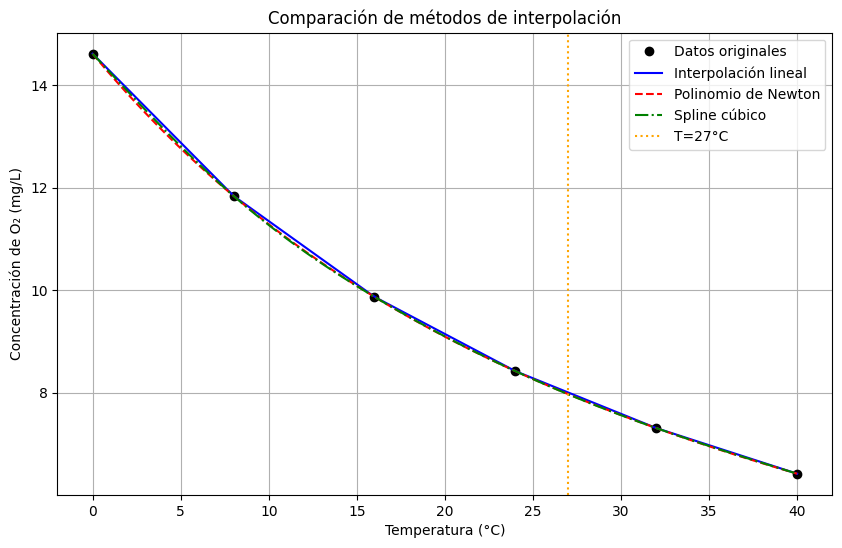

In [188]:
# Crear un rango de temperaturas para graficar
T_plot = np.linspace(0, 40, 100)

# Calcular las interpolaciones para el gráfico
o_linear_plot = np.interp(T_plot, T, o)
o_newton_plot = [newton_interpolation(T,o,x) for x in T_plot]
o_spline_plot = cubic_spline(T_plot)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(T, o, 'ko', label='Datos originales')
plt.plot(T_plot, o_linear_plot, 'b-', label='Interpolación lineal')
plt.plot(T_plot, o_newton_plot, 'r--', label='Polinomio de Newton')
plt.plot(T_plot, o_spline_plot, 'g-.', label='Spline cúbico')
plt.axvline(x=T_interp, color='orange', linestyle=':',label='T=27°C')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Concentración de O₂ (mg/L)')
plt.title('Comparación de métodos de interpolación')
plt.legend()
plt.grid()
plt.show()

# 2.

A partir de un experimento, el coeficiente de conducción de calor $k$ de un material de aluminio varía con la temperatura $T$ como se muestra en la tabla. Derive el polinomio de interpolación de Lagrange para estimar los valores del coeficiente de conducción de calor a $ 50^\circ C $, $ 250^\circ C$ y $ 500^\circ C$.

```
T = np.array([-100, 0, 100, 200, 300, 400]) # Temperaturas en °C
k = np.array([215, 202, 206, 215, 228, 249]) # Coeficientes de conducción de calor en W/(m·°C)
```

In [189]:
def lagrange_interpolation(x_data, y_data, x_interp):
    """
    Interpolación de Lagrange para estimar y en x_interp
    
    Parámetros:
    x_data: array de valores x conocidos
    y_data: array de valores y conocidos
    x_interp: valor x donde se quiere interpolar
    
    Retorna:
    y_interp: valor interpolado en x_interp
    """
    n = len(x_data)
    y_interp = 0.0
    
    for i in range(n):
        # Calcular el término base de Lagrange L_i(x)
        term = y_data[i]
        for j in range(n):
            if j != i:
                term *= (x_interp - x_data[j]) / (x_data[i] - x_data[j])
        y_interp += term
    
    return y_interp

In [190]:
# Datos del problema
T = np.array([-100, 0, 100, 200, 300, 400])  # Temperaturas en °C
k = np.array([215, 202, 206, 215, 228, 249])  # Coeficientes en W/(m·°C)

In [191]:
# Puntos a interpolar
T_interp = [50, 250, 500]

In [192]:
# Calcular las interpolaciones
results = {}
for temp in T_interp:
    results[temp] = lagrange_interpolation(T, k, temp)

# Mostrar resultados
for temp, k_val in results.items():
    print(f"k({temp}°C) = {k_val:.2f} W/(m·°C)")

k(50°C) = 202.95 W/(m·°C)
k(250°C) = 220.80 W/(m·°C)
k(500°C) = 281.00 W/(m·°C)


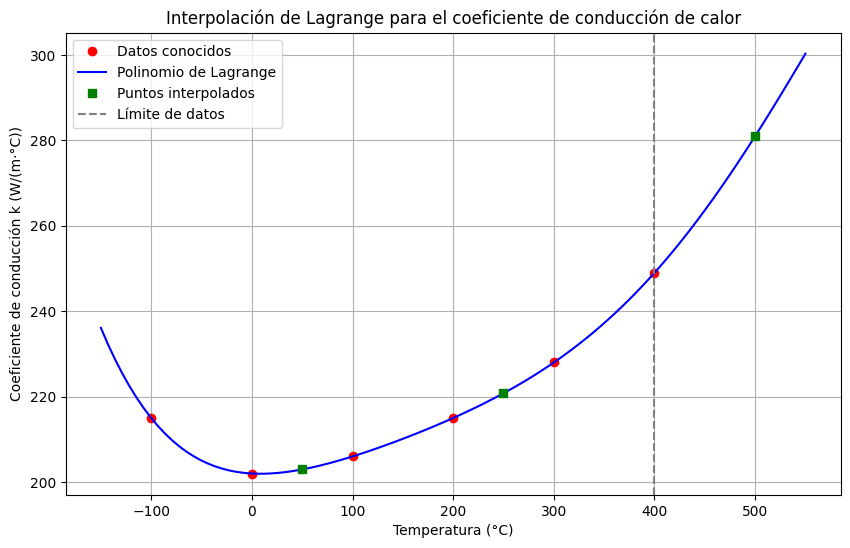

In [193]:
# Rango de temperaturas para graficar
T_plot = np.linspace(-150, 550, 100)
k_plot = [lagrange_interpolation(T, k, t) for t in T_plot]

# Puntos originales y puntos interpolados
plt.figure(figsize=(10, 6))
plt.plot(T, k, 'ro', label='Datos conocidos')
plt.plot(T_plot, k_plot, 'b-', label='Polinomio de Lagrange')
plt.plot(T_interp, list(results.values()), 'gs', label='Puntos interpolados')

# Configuración del gráfico
plt.title('Interpolación de Lagrange para el coeficiente de conducción de calor')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Coeficiente de conducción k (W/(m·°C))')
plt.axvline(x=400, color='gray', linestyle='--', label='Límite de datos')
plt.legend()
plt.grid(True)
plt.show()

# 3.
El conjunto de datos en la siguiente tabla representa el desplazamiento $u$ de un resorte debido a una fuerza aplicada $F$. Utilice un programa que implemente el método de diferencias divididas de Newton y el método de interpolación de Lagrange para estimar la fuerza necesaria para desplazar el resorte a $ 0.3 \, \text{m} $ y $0.4 \, \text{m} $. Luego, grafique la función obtenida del programa junto con los puntos de datos proporcionados.

```
u = np.array([0.107, 0.172, 0.238, 0.351, 0.388, 0.417, 0.432, 0.441])  # desplazamiento (m)
F = np.array([100, 200, 300, 400, 500, 600, 700, 800])  # fuerza (kN)
```

In [194]:
# Datos proporcionados
u = np.array([0.107, 0.172, 0.238, 0.351, 0.388, 0.417, 0.432, 0.441])  # desplazamiento (m)
F = np.array([100, 200, 300, 400, 500, 600, 700, 800])  # fuerza (kN)

# Puntos a interpolar
u_interp = [0.3, 0.4]


In [195]:
# Calcular interpolaciones
results = {
    'Newton': {},
    'Lagrange': {}
}

for method in results.keys():
    for ui in u_interp:
        if method == 'Newton':
            results[method][ui] = newton_interpolation(u, F,ui)
        else:
            results[method][ui] = lagrange_interpolation(u, F, ui)

# Mostrar resultados
print("Resultados de interpolación:")
for method in results:
    print(f"\nMétodo {method}:")
    for ui, Fi in results[method].items():
        print(f"F({ui:.1f}m) = {Fi:.2f} kN")

Resultados de interpolación:

Método Newton:
F(0.3m) = 315.05 kN
F(0.4m) = 535.11 kN

Método Lagrange:
F(0.3m) = 315.05 kN
F(0.4m) = 535.11 kN


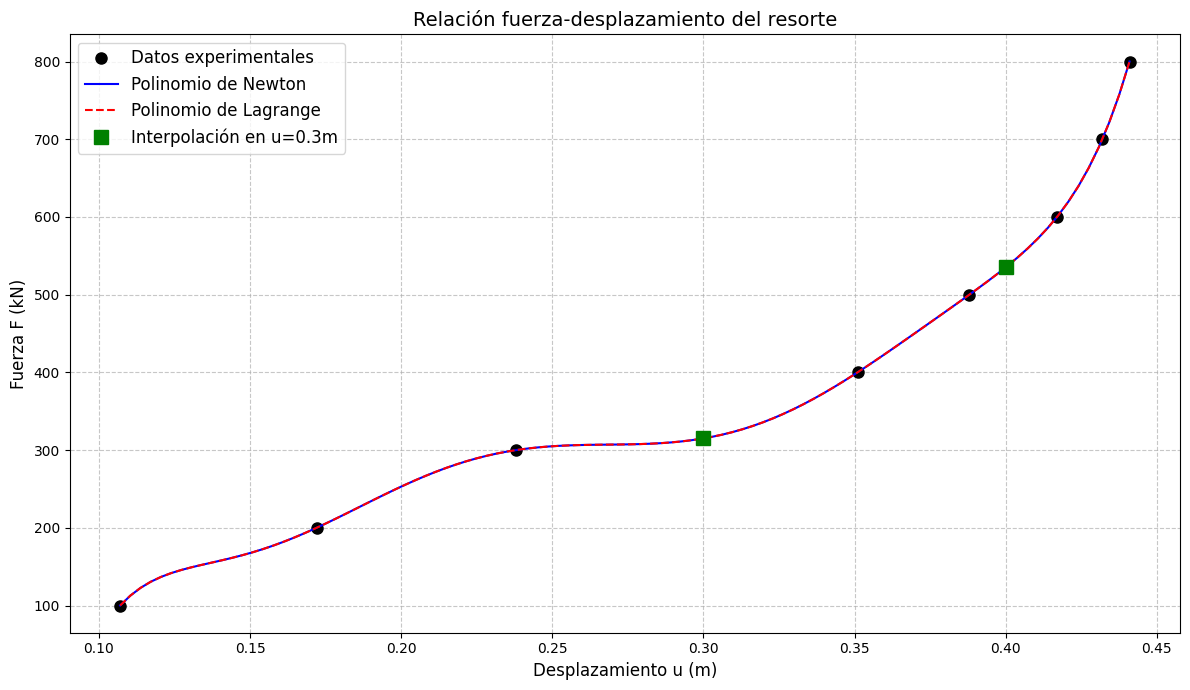

In [196]:
# Crear un rango de desplazamientos para graficar
u_plot = np.linspace(min(u), max(u), 100)

# Calcular interpolaciones para el gráfico
F_newton_plot = [newton_interpolation(u, F, up) for up in u_plot]
F_lagrange_plot = [lagrange_interpolation(u, F, up) for up in u_plot]

# Configurar el gráfico
plt.figure(figsize=(12, 7))
plt.plot(u, F, 'ko', markersize=8, label='Datos experimentales')

# Graficar las interpolaciones
plt.plot(u_plot, F_newton_plot, 'b-', label='Polinomio de Newton')
plt.plot(u_plot, F_lagrange_plot, 'r--', label='Polinomio de Lagrange')

# Marcar los puntos interpolados
for ui in u_interp:
    plt.plot(ui, results['Newton'][ui], 'gs', markersize=10, 
             label=f'Interpolación en u={ui}m' if ui == u_interp[0] else "")

# Configuraciones adicionales
plt.title('Relación fuerza-desplazamiento del resorte', fontsize=14)
plt.xlabel('Desplazamiento u (m)', fontsize=12)
plt.ylabel('Fuerza F (kN)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# 4.
La disminución de temperatura debido al viento (sensación térmica) depende de la velocidad del viento. Un conjunto de datos de temperatura que varía con la velocidad del viento se muestra en la siguiente tabla. Utilice el método de diferencias divididas de Newton para estimar la temperatura a una velocidad del viento de 35 km/h. A partir de los datos proporcionados, ¿es posible que la temperatura descienda por debajo de -50 °C? Si es posible, encuentre la velocidad del viento que causa dicha temperatura.

```
viento = np.array([0, 10, 20, 30, 40, 50])  # Velocidad del viento (km/h)
temperatura = np.array([-12, -23, -31, -36, -38, -39])  # Temperatura (°C)
```

In [197]:
# Datos proporcionados
viento = np.array([0, 10, 20, 30, 40, 50])  # km/h
temperatura = np.array([-12, -23, -31, -36, -38, -39])  # °C

# 1. Estimación a 35 km/h
temp_35 = newton_interpolation(viento, temperatura, 35)
print(f"Temperatura estimada a 35 km/h: {temp_35:.2f} °C")

Temperatura estimada a 35 km/h: -37.32 °C


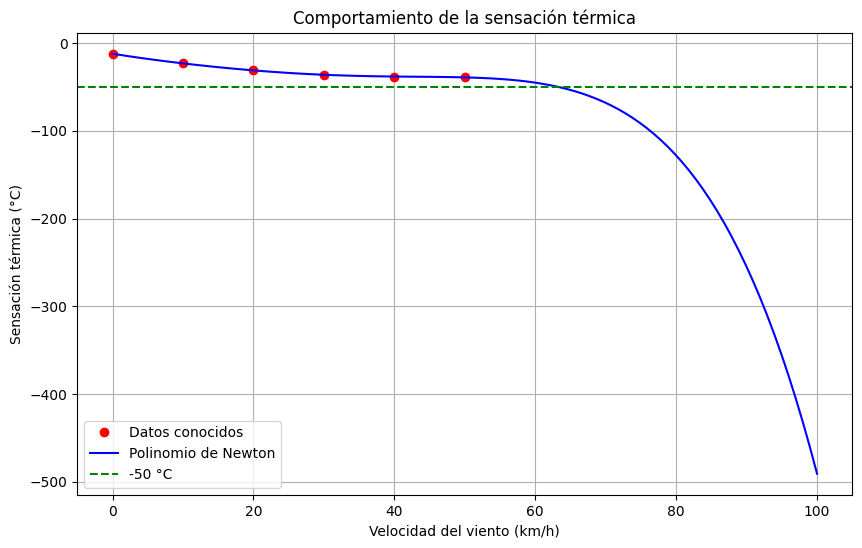

In [198]:
# Rango extendido para visualización
viento_ext = np.linspace(0, 100, 100)
temp_ext = [newton_interpolation(viento, temperatura, v) for v in viento_ext]

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(viento, temperatura, 'ro', label='Datos conocidos')
plt.plot(viento_ext, temp_ext, 'b-', label='Polinomio de Newton')
plt.axhline(y=-50, color='g', linestyle='--', label='-50 °C')
plt.xlabel('Velocidad del viento (km/h)')
plt.ylabel('Sensación térmica (°C)')
plt.title('Comportamiento de la sensación térmica')
plt.legend()
plt.grid()
plt.show()

In [199]:
from scipy.optimize import newton

# Función objetivo para encontrar la raíz (T(v) + 50 = 0)
def func(v):
    return newton_interpolation(viento, temperatura, v) + 50

# Estimación inicial basada en la tendencia
v_guess = 60  # km/h (valor inicial para la búsqueda)

v_critico = newton(func, v_guess)

print(f"\nLa temperatura alcanza -50 °C a aproximadamente {v_critico:.2f} km/h")

# Verificación
temp_verificacion = newton_interpolation(viento, temperatura, v_critico)
print(f"Temperatura verificada a {v_critico:.2f} km/h: {temp_verificacion:.6f} °C")


La temperatura alcanza -50 °C a aproximadamente 63.35 km/h
Temperatura verificada a 63.35 km/h: -50.000000 °C


# 5.
Los siguientes datos describen la presión (kPa) versus altitud desde el nivel del mar según la Atmósfera Estándar de EE.UU.:
```
altitud = np.array([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]) # en m
presion = np.array([101.33, 89.88, 79.50, 70.12, 61.66, 54.05, 47.22, 41.11, 35.65, 30.80, 26.50]) # en kPa
```

Utilizando un polinomio de Hermite y de Splines Cúbicos, determine la presión en la cima del monte Everest.


In [200]:
# Datos proporcionados
altitud = np.array([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]) # en m
presion = np.array([101.33, 89.88, 79.50, 70.12, 61.66, 54.05, 47.22, 41.11, 35.65, 30.80, 26.50]) # en kPa

# Altitud del Monte Everest en metros
everest = 8848.86

## Splines Cúbicos

In [201]:
# Crear el spline cúbico
cubic_spline = interpolate.CubicSpline(altitud, presion, bc_type='natural')

# Evaluar en la altitud del Everest
presion_spline = cubic_spline(everest)

print(f"Presión en el Everest (Splines Cúbicos): {presion_spline:.2f} kPa")

Presión en el Everest (Splines Cúbicos): 31.49 kPa


## Hermite

In [202]:
# Calcular derivadas aproximadas usando diferencias finitas
derivadas = np.gradient(presion, altitud)

# Crear interpolación de Hermite
hermite = interpolate.CubicHermiteSpline(altitud, presion, derivadas)

# Evaluar en la altitud del Everest
presion_hermite = hermite(everest)

print(f"Presión en el Everest (Hermite): {presion_hermite:.2f} kPa")

Presión en el Everest (Hermite): 31.50 kPa


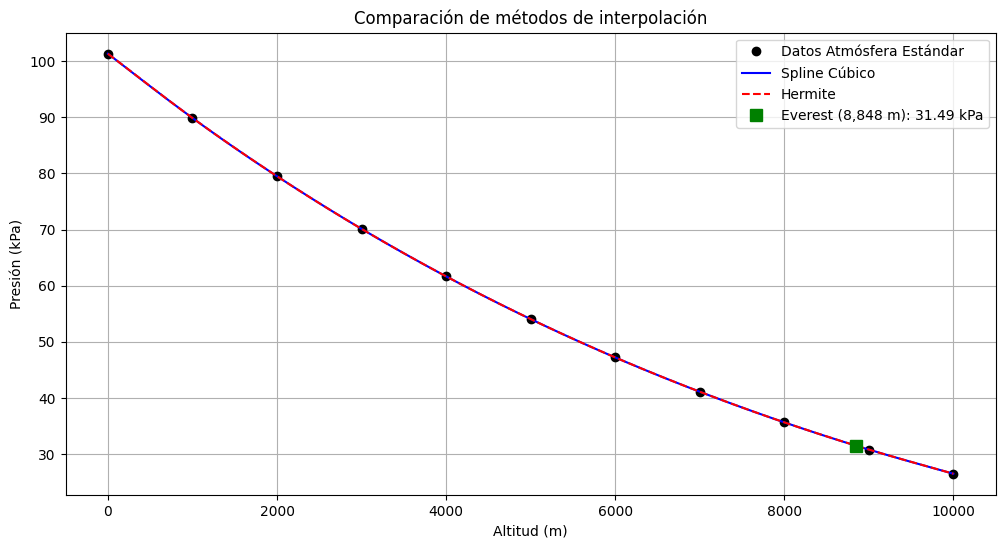

In [203]:
# Crear un rango para graficar
altitud_plot = np.linspace(0, 10000, 500)

# Gráfico comparativo
plt.figure(figsize=(12, 6))
plt.plot(altitud, presion, 'ko', label='Datos Atmósfera Estándar')
plt.plot(altitud_plot, cubic_spline(altitud_plot), 'b-', label='Spline Cúbico')
plt.plot(altitud_plot, hermite(altitud_plot), 'r--', label='Hermite')
plt.plot(everest, presion_spline, 'gs', markersize=8, 
         label=f'Everest (8,848 m): {presion_spline:.2f} kPa')
plt.xlabel('Altitud (m)')
plt.ylabel('Presión (kPa)')
plt.title('Comparación de métodos de interpolación')
plt.legend()
plt.grid(True)
plt.show()